In [16]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import re
import warnings
warnings.filterwarnings('ignore')

# Data Import

In [17]:
data = pd.read_csv('./data/after_clean.csv', index_col=None, encoding = 'utf_8_sig')
data_2019 = pd.read_csv('./data/after_clean_2019.csv', index_col=None, encoding = 'utf_8_sig')

In [18]:
data_2019['Cell'] = data_2019['Cell'].fillna('No')

In [19]:
data.columns

Index(['OrderID', 'MemberName', 'AlipayAccount', 'OwnedAmount', 'DeliveryFee',
       'PointsPaid', 'Total', 'PointsEarned', 'DirectPay', 'PointsPay',
       'OrderStatus', 'BuyerMessage', 'ReceiverName', 'ReceivingAdd',
       'DeliverMethod', 'CellPhone', 'OrderTime', 'PaytTime', 'ItemName',
       'ItemCate', 'DeliverCompany', 'OrderNote', 'OrderItemNo',
       'DeliveredTime', 'StoreReceived', 'CunTaoOrder', 'Province', 'City',
       'OrderYear', 'OrderMonth', 'OrderToPay(s)', 'PayToReceive(h)'],
      dtype='object')

In [20]:
data_2019['OrderStatus'].unique()

array(['交易成功', '交易关闭'], dtype=object)

In [21]:
data_2019['OrderNote'][data_2019['OrderNote'].apply(lambda x: bool(re.search("电话拒接", x))) != False]

1682    '电话拒接
Name: OrderNote, dtype: object

In [22]:
data_2019.iloc[1682]['OrderNote'] = "'电话拒接"

In [23]:
words_fail = data_2019[(data_2019['OrderStatus']== '交易关闭') & (data_2019['OrderNote']!= 'No')]['OrderNote']
words_success = data_2019[(data_2019['OrderStatus']== '交易成功') & (data_2019['OrderNote']!= 'No')]['OrderNote']

In [24]:
words_fail

17                                   '淘客
51                           '货已经收到，确认退款
61                           '货已经收到，确认退款
105                           '重复的订单  退款
152                                '退款  
167                          '货已经收到，确认退款
168                          '货已经收到，确认退款
178                            '退款，重复的订单
192                                  '笔袋
218                          '退款   重新下单 
228         '货已经收到，退款  申通快递3718623236419
244                                  '礼品
254                               '书包买大了
273                                '邮政快递
336                          '货已经收到，确认退款
365                          '货已经收到，确认退款
373                            '退款，重复的订单
379                          '货已经收到，确认退款
434                   '退款 重新下单   没有领取优惠券
443                                  '退款
457                             '电话不接 3次
596                          '货已经收到，确认退款
614                          '货已经收到，确认退款
632                          '货已经收到，确认退款
635             

In [25]:
remove_list = ["'", ":", "+", "T", "!"]
#words_fail = i.replace("'", "") for i in words_fail
words_fail = list(map(lambda i: i.replace("'",""),words_fail))
words_fail = list(map(lambda i: re.sub('\d', '', i),words_fail))
words_fail = ' '.join(i for i in words_fail if not i.isdigit())

In [26]:
words_fail

'淘客 货已经收到，确认退款 货已经收到，确认退款 重复的订单  退款 退款   货已经收到，确认退款 货已经收到，确认退款 退款，重复的订单 笔袋 退款   重新下单  货已经收到，退款  申通快递 礼品 书包买大了 邮政快递 货已经收到，确认退款 货已经收到，确认退款 退款，重复的订单 货已经收到，确认退款 退款 重新下单   没有领取优惠券 退款 电话不接 次 货已经收到，确认退款 货已经收到，确认退款 货已经收到，确认退款 电话不接 退款，等一下从新下单 退款 退款，重新购买  货没有发出，确认退款 货已经收到， 确认退款 货已经收到，确认退款 货已经收到，确认退款 货已经收到，确认退款 货已经收到，确认退款 货已经收到，确认退款 拍错款式，从新下单 货已经收到，确认退款 货已经收到，确认退款 重复的订单 货没有发出，确认退款 货已经收到，确认退款，圆通快递 货已经收到，确认退款 货已经收到，确认退款 退款 退款，从新下单，凑满元 退款，外国的订单 货已经收到，确认退款 货已经收到，确认退款 货已经收到，确认退款 退款，重新拍 退款，地址点错，重新下单 货已经收到 ，确认退款 退款 货已经收到，确认退款 货已经收到，确认退款 货已经收到，确认退款 货已经收到，确认退款 退款  在系列店铺下单了 小孩不喜欢 退款 电话不接 退款，重复的订单 收货人不是购买的本人 退款 退款 货未发出，可以退款 货没有发出，确认退款，重新下单 个 退款 电话拒接 退款，从新拍 货已经收到，确认退款 货已经收到，确认退款   中通快递 退款，说不要了 退款，换其他的款式从新拍 退款 优 退款，重复的订单'

In [27]:
remove_list = ["'", ":", "+", "T", "!"]
#words_fail = i.replace("'", "") for i in words_success
words_success = list(map(lambda i: i.replace("'",""),words_success))
words_success = list(map(lambda i: re.sub('\d', '', i),words_success))
words_success = ' '.join(i for i in words_success if not i.isdigit())

In [28]:
words_success

'笔袋 水杯 顺丰 韵达快递 电池盒 浙江发货 笔袋 笔袋 发票 配件 文具盒 笔袋 公主 玫 套 笔袋 礼品 浙江发货 笔袋 笔袋 礼品 发票 礼品 礼品 礼品 礼品 帽子 邮政快递 笔袋 礼品 个 礼品 笔袋 帽子 圆通发货 礼品 圆通快递 礼品 礼品 浙江发 礼品 笔袋  手提袋 礼品 礼品 送笔袋 礼品 套尺 礼品 礼品 个书包个套尺 礼品 黄色帽子 礼品 礼品 收件人拒收，货已经退回上海 套尺 黑色的帽子 圆通快递 套尺 套尺  、 号零件   号零件 圆通快递 顺丰 礼品 套尺 风叶 迪宝乐发 发票 不退货了 发票 号零件 收到货退元差价，送二个迪士尼礼袋 发货单 发票 万高发 顺丰 礼品 发个  发票 写卡片卡片就写:丁丁，好好学习，天天向上，妈妈想你，永远爱你！ 顺丰 大号  浙江发 号零件 正确的单号 风叶  文具盒 号零件 浙江发 货已经收到，确认退款 蓝色文具盒 发彩兰个  宝蓝个 电池盒 迪宝乐发 迪宝乐发 万高发 套电子积木 货已经收到， 灯泡 发一个黑色的 发票 天虹幼儿园 男款水杯 电池盒  号零件 男款保温杯 货已经收到，确认退款 发个灯泡 个笔袋 顺丰 号零件 号零件个 号零件 送玩具 银河版金 转运仓 手提袋 送玩具 迪宝乐发 贺卡 韵达 个 正常发 浙江发 底板 号零件 正常发  优 发个 退元 发票 优 优 个手提袋 浙江发 正常发 顺丰 优 藏青色笔袋 件 优 优 迪宝乐发 优 优 优 发票 个拼 发拼 迪宝乐发 迪宝乐发 顺丰到付 迪宝乐发 帽子单号  迪宝乐发 货已经收到，确认退款  圆通快递 个   号零件 迪宝乐发 迪宝乐发 万高发 发套 风叶 号零件 号零件 男款帽子 优 优 优 个拼 迪宝乐发 迪宝乐发 优 迪宝乐发 手提袋 优 优 优 发票 发套 迪宝乐发 仅退款元 顺丰 优 发拼的发套 优 优 迪宝乐发  迪宝乐发 优 迪宝乐发 迪宝乐发 大小颗粒桌面 迪宝乐发 电池盒 优 个 优 银色文具盒 优 不退了 迪宝乐发货 优 帽子 文具盒  号零件  号号  电池盒盖子 优 优 优 号零件 发 优 电子积木送电池+文具套装+挂件 优 优 优 优 优 浙江发 发个     粉色款个  牛仔布款个 浙江发 风叶 优 优 优 套尺 个星空版 优 送儿童帽子 个 送一个礼物 杭州电子科技大学，T  优 优 优 换黑色乱花

In [29]:

#result = ''.join(i for i in note_success if not i.isdigit())
# result = note_success.replace("'", "")
# result = result.replace(" ", "")
# result = result.replace(":", "")
#result=list(map(lambda s: ''.join(i for i in s if not i.isdigit()), note_success))
# remove_list = ["'", ":", " ", "，", "+", "T", "!"]
# result = ''.join(i for i in note_success if not i.isdigit())
# result = ''.join(i for i in result if i not in remove_list)
# words = list(map(lambda s: s, result))
# words = list(map(lambda s: "a ".join(s), words))
# words = split(result)

In [30]:
import jieba
mytext = " ".join(jieba.cut(words_success))

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/9z/nsvy14wx09d254xt8p1b_dzm0000gn/T/jieba.cache
Loading model cost 0.848 seconds.
Prefix dict has been built succesfully.


## Word Cloud

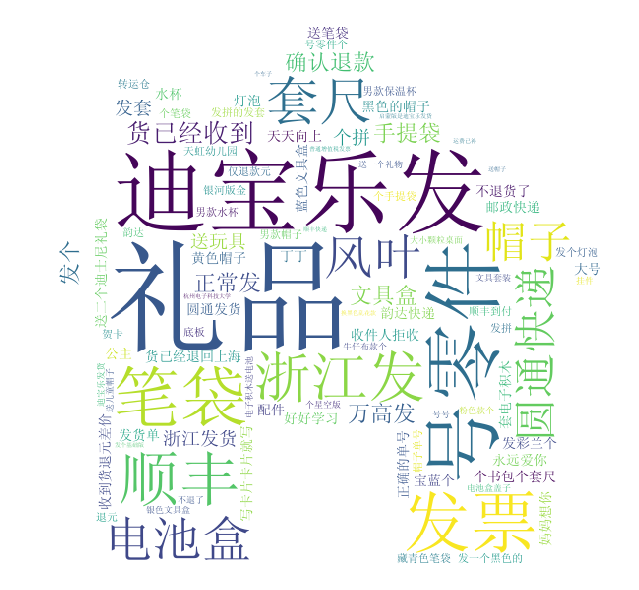

In [33]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import urllib
import requests
import numpy as np
import matplotlib.pyplot as plt

#words = 'access guest guest apartment area area bathroom bed bed bed bed bed bedroom block coffee coffee coffee coffee entrance entry francisco free garden guest home house kettle kettle kitchen kitchen kitchen kitchen kitchen kitchenliving located microwave neighborhood new park parking place privacy private queen room san separate seperate shared space space space street suite time welcome'
mask = np.array(Image.open(requests.get('http://www.clker.com/cliparts/O/i/x/Y/q/P/yellow-house-hi.png', stream=True).raw))

# This function takes in your text and your mask and generates a wordcloud. 
def generate_wordcloud(words, mask):
    word_cloud = WordCloud(width = 512, height = 512, background_color='white', stopwords=STOPWORDS, font_path="simsun.ttf", mask=mask).generate(words)
    plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
    
#Run the following to generate your wordcloud
generate_wordcloud(words_success, mask)

** the  on 2010~2019 all orders**



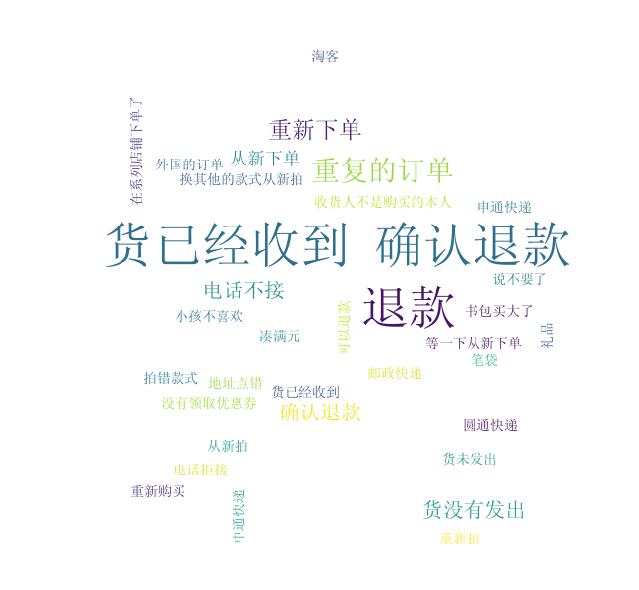

In [32]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import urllib
import requests
import numpy as np
import matplotlib.pyplot as plt

#words = 'access guest guest apartment area area bathroom bed bed bed bed bed bedroom block coffee coffee coffee coffee entrance entry francisco free garden guest home house kettle kettle kitchen kitchen kitchen kitchen kitchen kitchenliving located microwave neighborhood new park parking place privacy private queen room san separate seperate shared space space space street suite time welcome'
mask = np.array(Image.open(requests.get('http://www.clker.com/cliparts/O/i/x/Y/q/P/yellow-house-hi.png', stream=True).raw))

# This function takes in your text and your mask and generates a wordcloud. 
def generate_wordcloud(words, mask):
    word_cloud = WordCloud(width = 512, height = 512, background_color='white', stopwords=STOPWORDS, font_path="simsun.ttf",mask=mask).generate(words)
    plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
    
#Run the following to generate your wordcloud
generate_wordcloud(words_fail, mask)

In [ ]:
words = "We're seeing hotter heat waves, drier droughts, bigger storm surges and more Scientists are detecting a stronger link between the planet's warming and its changing weather patterns. Though it can be hard to pinpoint whether climate change intensified a particular weather event, we're learning more.Heat and drought The dangerous effects of heat waves, including death, occur as a result of both temperature and humidity especially if those conditions "

In [ ]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import urllib
import requests
import numpy as np
import matplotlib.pyplot as plt

#words = 'access guest guest apartment area area bathroom bed bed bed bed bed bedroom block coffee coffee coffee coffee entrance entry francisco free garden guest home house kettle kettle kitchen kitchen kitchen kitchen kitchen kitchenliving located microwave neighborhood new park parking place privacy private queen room san separate seperate shared space space space street suite time welcome'
mask = np.array(Image.open(requests.get('http://www.clker.com/cliparts/O/i/x/Y/q/P/yellow-house-hi.png', stream=True).raw))

# This function takes in your text and your mask and generates a wordcloud. 
def generate_wordcloud(words, mask):
    word_cloud = WordCloud(width = 512, height = 512, background_color='white', stopwords=STOPWORDS, mask=mask).generate(words)
    plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
    
#Run the following to generate your wordcloud
generate_wordcloud(words, mask)